# Histogram of Oriented Gradients

Histogramele de Gradienți Orientați (HOG) reprezintă o tehnică de extragere a caracteristicilor din imagini, folosită în principal pentru recunoașterea obiectelor (de exemplu, detectarea pietonilor). Această metodă este robustă la iluminare și micile variații de poziție sau formă, concentrându-se pe structura locală a contururilor și marginilor din imagine.

HOG captează direcțiile predominante ale gradientului într-o imagine (adică, modul în care intensitatea pixelilor se schimbă în vecinătate). Marginea unui obiect este evidențiată prin aceste schimbări de intensitate.

Etapele algoritmului sunt, in mare, următoarele:


 - Imaginea este convertită în tonuri de gri
 - Se calculează gradientul imaginii în direcțiile X și Y, de obicei folosind un filtru Sobel. Se obțin:
     - Magnitudinea gradientului (cât de abruptă e schimbarea)
     - Unghiul (orientarea) gradientului
 - Imaginea este împărțită în blocuri (8 x 8 sau 16 x 16 pixeli)

In [2]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import color, exposure, io
import numpy as np
from scipy.ndimage import sobel


## Calculul gradientului intr-un pixel

Gradientul intr-un punct reprezinta directia care are cea mai mare inclinare impreuna cu marimea acestei inclinari. Gradientul este o marime vectoriala, in cazul nostru un vector intr-un spatiu bidimensional. Gradientul pe care il calculam aici este un gradient al intensitatii luminoase. De fiecare data, gradientul se calculeaza pornind de la un pixel, prin calculul diferentelor intre intentitatile pixelilor in dreapta si cel din stanga (pentru gx) si diferenta intre intensitatea pixelului de deasupra si cel de dedesubt (pentru gx), divizate la distanta dintre cei 2 pixeli (in cazul nostru 2. Acest mod ce calcul se numeste "aproximare prin diferente finite centrate".

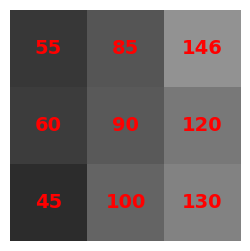

In [ ]:
minimatrix = np.array([
    [ 45, 100, 130],
    [ 60,  90, 120],
    [ 55,  85, 146]
])

scale = 400  # Scale factor for visualization

# Create the figure and axes
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(minimatrix, cmap='gray', vmin=0, vmax=255, extent=[0, 3*scale, 0, 3*scale])

# Draw grid lines and cell values
for y in range(3):
    for x in range(3):
        cell_value = int(minimatrix[y, x])
        # Plot the value in the center of the scaled cell
        ax.text(x * scale + scale / 2, (2 - y) * scale + scale / 2,  # (2 - y) flips the y-axis
                str(cell_value),
                va='center', ha='center',
                color='red', fontsize=14, weight='bold')

plt.axis('off')

plt.gca().invert_yaxis()
plt.show()

In [ ]:
center_y, center_x = 1, 1

# Calculam gradientul orizontal
gx = (minimatrix[center_y, center_x + 1] - minimatrix[center_y, center_x - 1]) / 2 # gx = 120 - 60 = 60 / 2 = 30


# Calculam gradientul vertical
# Gy = bottom - top
gy = (minimatrix[center_y + 1, center_x] - minimatrix[center_y - 1, center_x]) /2 # gy = 85 - 100 = -15 / 2 = -7.5

# Step 5: Calculam dimensiunea si unghiul
magnitude = np.sqrt(gx**2 + gy**2)
angle_rad = np.arctan2(gy, gx)      # unghiul in radiani
angle_deg = np.degrees(angle_rad)   # unghiul in grade

# Output all intermediate results
print(f"Gx (orizontal): {gx}")
print(f"Gy (vertical): {gy}")
print(f"Dimensiune: {magnitude:.2f}")
print(f"Unghi (radians): {angle_rad:.2f}")
print(f"Unghi (degrees): {angle_deg:.2f}")

Gx (orizontal): 30.0
Gy (vertical): -7.5
Dimensiune: 30.92
Unghi (radians): -0.24
Unghi (degrees): -14.04


Putem vizualiza cei trei vectori (gx, gy si rezultatul)

(np.float64(0.0), np.float64(1200.0), np.float64(0.0), np.float64(1200.0))

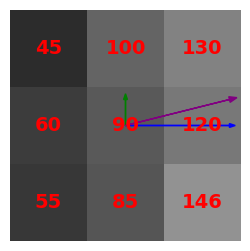

In [ ]:
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(minimatrix, cmap='gray', vmin=0, vmax=255, extent=[0, 3*scale, 0, 3*scale])

scale = 400

# Draw grid lines and cell values
for y in range(3):
    for x in range(3):
        cell_value = int(minimatrix[y, x])
        # Plot the value in the center of the scaled cell
        ax.text(x * scale + scale / 2, (2 - y) * scale + scale / 2,  # (2 - y) flips the y-axis
                str(cell_value),
                va='center', ha='center',
                color='red', fontsize=14, weight='bold')

arrow_scale = 18  # Adjust for better visualization
center_pixel_x_pos = center_x * scale + scale / 2
center_pixel_y_pos = (2 - center_y) * scale + scale / 2

# Plot the x vector (horizontal gradient)
ax.arrow(center_pixel_x_pos, center_pixel_y_pos, gx * arrow_scale, 0,
         head_width=20, head_length=30, fc='blue', ec='blue', label='Gx')

# Plot the y vector (vertical gradient)
ax.arrow(center_pixel_x_pos, center_pixel_y_pos, 0, -gy * arrow_scale, # -gy because y-axis is inverted
         head_width=20, head_length=30, fc='green', ec='green', label='Gy')

# Plot the gradient vector
ax.arrow(center_pixel_x_pos, center_pixel_y_pos, gx * arrow_scale, -gy * arrow_scale,
         head_width=30, head_length=40, fc='purple', ec='purple', label='Gradient')

# ax.legend()

plt.axis('off')

# plt.gca().invert_yaxis()
# plt.show()

## Exemplu pentru o matrice 8 x 8



In [ ]:
# Matricea furnizată (8x8)
matrix = np.array([
    [120, 116, 132, 112, 64, 65, 63, 64],
    [121, 115, 115, 72, 68, 63, 60, 59],
    [99, 121, 103, 67, 63, 57, 54, 52],
    [104, 115, 56, 52, 50, 51, 56, 56],
    [109, 59, 54, 49, 48, 51, 55, 54],
    [59, 57, 52, 48, 46, 42, 38, 37],
    [60, 54, 44, 42, 40, 32, 31, 27],
    [45, 41, 35, 33, 32, 32, 32, 29]
], dtype=np.float32)

# matrix = np.array([
#     [74, 71, 68, 66, 64, 65, 63, 64],
#     [78, 78, 76, 72, 68, 63, 60, 59],
#     [71, 72, 71, 67, 63, 57, 54, 52],
#     [63, 60, 56, 52, 50, 51, 56, 56],
#     [63, 59, 54, 49, 48, 51, 55, 54],
#     [59, 57, 52, 48, 46, 42, 38, 37],
#     [60, 54, 44, 42, 40, 32, 31, 27],
#     [45, 41, 35, 33, 32, 32, 32, 29]
# ], dtype=np.float32)
matrix = np.rot90(matrix, k=1)

Afisarea matricii

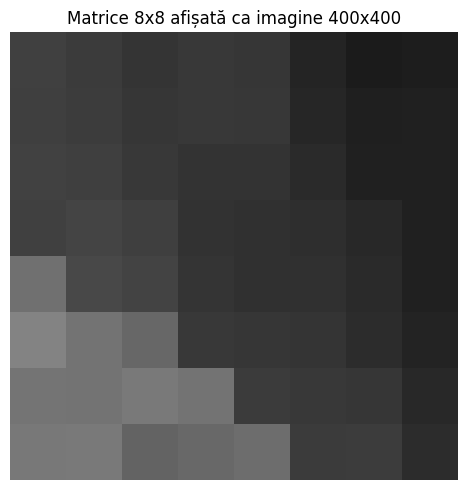

In [ ]:
scale_factor = 50  # 8 * 50 = 400
image_scaled = np.kron(matrix, np.ones((scale_factor, scale_factor)))

# Afișare
plt.figure(figsize=(5, 5))
plt.imshow(image_scaled, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
plt.title("Matrice 8x8 afișată ca imagine 400x400")
plt.axis('off')
plt.tight_layout()
plt.show()

# Exemplu de calcul al gradientilor intr-un bloc de 8 x 8 pixeli

In continuare, calculam pentru fiecare celula gradientul (variatia de intensitate) pe cele doua axe, x si y.
- itereaza dupa linii si coloane pixelii interiori (fara cei care se afla pe marginea matricii).
- pentru fiecare pixel interior calculeaza gradientii orizontal (gx) si vertical (gy) folosind diferente finite.

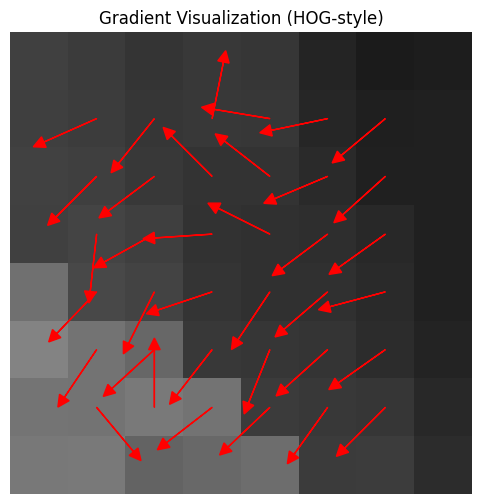

In [ ]:
# Dimensiuni
h, w = matrix.shape

# Bin-urile pentru orientări între 0° și 180° (9 bin-uri = 20° fiecare)

# Calcularea gradientului și a histogramei
plt.figure(figsize=(6, 6))
plt.imshow(matrix, cmap='gray', vmin=0, vmax=255)

for y in range(1, h - 1):
    for x in range(1, w - 1):
        gx = matrix[y, x + 1] - matrix[y, x - 1]
        gy = matrix[y + 1, x] - matrix[y - 1, x]
        magnitude = np.sqrt(gx ** 2 + gy ** 2)

        angle_rad = np.arctan2(gy, gx)           # în [-π, +π]
        orientation = (np.degrees(angle_rad) % 180)  # în [0, 180)

        dx = np.cos(angle_rad)
        dy = np.sin(angle_rad)

        plt.arrow(x, y, dx, dy, color='red', head_width=0.2, head_length=0.2)
        # Găsirea bin-ului corespunzător

plt.title('Gradient Visualization (HOG-style)')
plt.axis('off')
plt.show()

## Calculul gradientilor cu repartizarea lor in histograma

Fiecare pixel va produce un gradient care va fi reprezentat de orientare si marime. Se creaza o histograma in care sunt distribuite orientarile gradientilor, ponderate de marimea acestora. Astfel, un pixel care va genera un gradient de o marime redusa, va contribui mai putin la acel interval de histograma decat unul care va avea acelasi unghi dar o marime semnificativa. Vom crea o histograma cu 9 intervale (fiecare acopering 20 de grade de orientare).

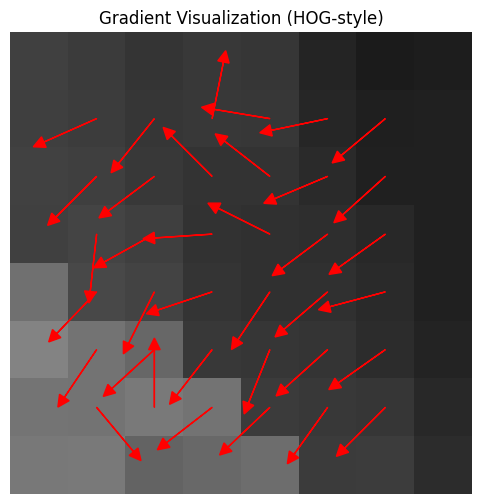

In [ ]:
# Dimensiuni
h, w = matrix.shape

# Bin-urile pentru orientări între 0° și 180° (9 bin-uri = 20° fiecare)
num_bins = 9
bin_edges = np.linspace(0, 180, num_bins + 1)
histogram = np.zeros(num_bins)

# Calcularea gradientului și a histogramei
plt.figure(figsize=(6, 6))
plt.imshow(matrix, cmap='gray', vmin=0, vmax=255)

for y in range(1, h - 1):
    for x in range(1, w - 1):
        gx = matrix[y, x + 1] - matrix[y, x - 1]
        gy = matrix[y + 1, x] - matrix[y - 1, x]
        magnitude = np.sqrt(gx ** 2 + gy ** 2)

        angle_rad = np.arctan2(gy, gx)           # în [-π, +π]
        orientation = (np.degrees(angle_rad) % 180)  # în [0, 180)

        dx = np.cos(angle_rad)
        dy = np.sin(angle_rad)

        plt.arrow(x, y, dx, dy, color='red', head_width=0.2, head_length=0.2)
        # Găsirea bin-ului corespunzător
        bin_index = np.searchsorted(bin_edges, orientation, side='right') - 1
        if bin_index == num_bins:
            bin_index -= 1
        histogram[bin_index] += magnitude

plt.title('Gradient Visualization (HOG-style)')
plt.axis('off')
plt.show()

# Afișarea histogramei

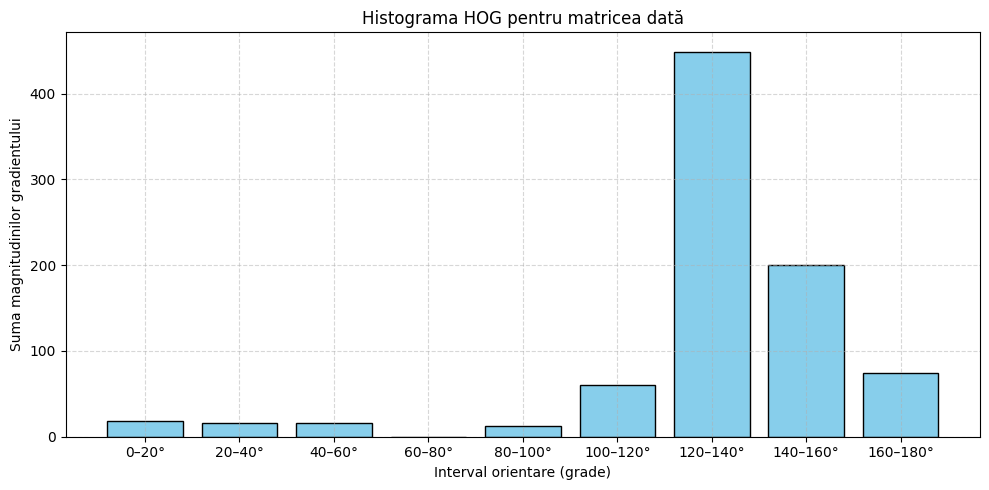

In [ ]:
# Afișarea histogramei
bin_labels = [f"{int(bin_edges[i])}–{int(bin_edges[i+1])}°" for i in range(num_bins)]

plt.figure(figsize=(10, 5))
plt.bar(bin_labels, histogram, width=0.8, color='skyblue', edgecolor='black')
plt.title("Histograma HOG pentru matricea dată")
plt.xlabel("Interval orientare (grade)")
plt.ylabel("Suma magnitudinilor gradientului")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# histogram is length‑9 from your 8×8 block
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2    # e.g. [10, 30, …, 170]
best_bin = np.argmax(histogram)                      # index of the strongest bin
theta = np.deg2rad(bin_centers[best_bin])            # convert to radians
strength = histogram[best_bin]                       # its accumulated magnitude

print(f"Cel mai inalt interval: {best_bin}")
print(f"Orientarea celui mai bun interval in grade: {bin_centers[best_bin]} in radiani {theta}")

Cel mai inalt interval: 6
Orientarea celui mai bun interval in grade: 130.0 in radiani 2.2689280275926285


### Reprezentarea celui mai predomenint component al gradientului

HOG utilizeaza toate componentele histogramei dar pentru a ilustra sensibilitatea celui mai inalt interval al histogramei la distributia intensitatii pixelilor, putem reprezenta vectorul gradientului si izolinia corespunzatoare.

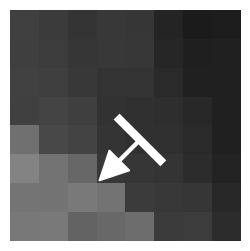

In [ ]:
cy, cx = matrix.shape[0] / 2, matrix.shape[1] / 2

plt.figure(figsize=(3, 3))
plt.imshow(matrix, cmap='gray', vmin=0, vmax=255)

# Draw the gradient direction line (in white)

perp_dx = -dy  # Perpendicular to dx
perp_dy = dx   # Perpendicular to dy
plt.plot([cx, cx + perp_dx], [cy, cy + perp_dy], color='blue', linestyle='--', linewidth=2)

# Draw the gradient direction line (in white)


plt.plot(
    [cx - perp_dx, cx + perp_dx],
    [cy - perp_dy, cy + perp_dy],
    color='white',  linewidth=6
)

#plt.plot([cx, cx + dx], [cy, cy + dy], color='white', linewidth=2)

#Draw the arrow at the end of the line
plt.arrow(cx, cy, dx, dy,
          color='white',
          width=0.1,
          head_width=1,
          head_length=1)

plt.axis('off')
plt.show()

### Reprezentarea tuturor componentelor gradientului, intr-un bloc de 8 x 8

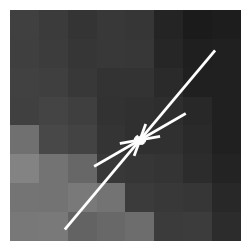

In [ ]:

max_magnitude = np.max(histogram)
if max_magnitude > 0:
    normalized = histogram / max_magnitude
else:
    normalized = histogram

top_n = 9

top_indices = np.argsort(histogram)[-top_n:]

plt.figure(figsize=(3, 3))
plt.imshow(matrix, cmap='gray', vmin=0, vmax=255)

for idx in top_indices:
    angle_deg = (bin_edges[idx] + bin_edges[idx + 1]) / 2
    angle_rad = np.deg2rad(angle_deg)

    length = 4 * normalized[idx]  # scale factor to make lines visible
    dx = np.cos(angle_rad) * length
    dy = np.sin(angle_rad) * length

    plt.plot([cx - dx, cx + dx], [cy - dy, cy + dy], color='white', linewidth=2)

plt.axis('off')
plt.show()

# Extragerea HOG pentru o imagine

# Importul fisierului

In [9]:
try:
    from google.colab import files
    from IPython.display import display
    uploaded = files.upload()  # Allows user to upload a file
    # Get the first uploaded file
    image_path = list(uploaded.keys())[0]
    image = io.imread(image_path)
except ImportError:
    # Fallback to skimage sample image (if not in Colab)
    from skimage import data
    image = data.astronaut()

Saving face_square_256.jpg to face_square_256.jpg


In [14]:
print("Image shape:", image.shape)

Image shape: (256, 256)


# Extragerea gradientului

In [10]:
if image.ndim == 3:
    image = color.rgb2gray(image)

fd, hog_image = hog(image, orientations=9, pixels_per_cell=(32, 32),
                    cells_per_block=(1, 1), visualize=True)

## Functia hog din skimage

Apelul functiei implica urmatorii parametrii:

```python
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True)
```                    

### Argumentele functiei

**image**
Imaginea de intrare (trebuie să fie în tonuri de gri).De obicei este o structura de tip NumPy bidimensional.

**orientations = 9**

Numărul de intervale ale histogramei. Un număr mai mare oferă o reprezentare mai detaliată a direcțiilor, dar crește dimensiunea vectorului de caracteristici.

**pixels_per_cell**

Reprezinta numarul de pixeli dintr-un bloc analizat. In exemplul nostru de mai sus am folosit un bloc de 8 x 8 pixeli, putem alege valori diferite.

**cells_per_block**

HOG aplică un pas suplimentar de normalizare a histogramelor, la cerere, in regiuni mai mari. Daca acest parametru este (1,1) inseamna ca procesul nu mai are loc. Daca parametrul este diferit (ex. 2,2) atunci se vor normaliza histogramele din grupuri de 4 blocuri.

**visualize=True**

Daca valoarea este True atunci functia va returna si o imagine cu gradientii desenati. Daca este False, atunci se va returna doar vectorul de caracteristici.

### Rezultatul functiei

**fd**

Vectorul de caracteristici este un vector a carui lungime depinde de parametrii introdusi si de dimensiunea imaginii. De exemplu,

- imaginea are 256 x 256 pixeli
- histogramele au 9 intervale
- dimensiunea fiecarei celule este de 32 x 32 de pixeli

256 / 32 = 8
8 x 8 = 64.
imaginea contine 64 de blocuri. Fiecare bloc genereaza 9 valori
dimensiunea finala a vectorului de caracteristici este de 64 x 9 = 576.

**hog_image**

Imaginea cu gradientii desenati.


In [13]:
print(len(fd))

576


## Afișarea rezultatelor

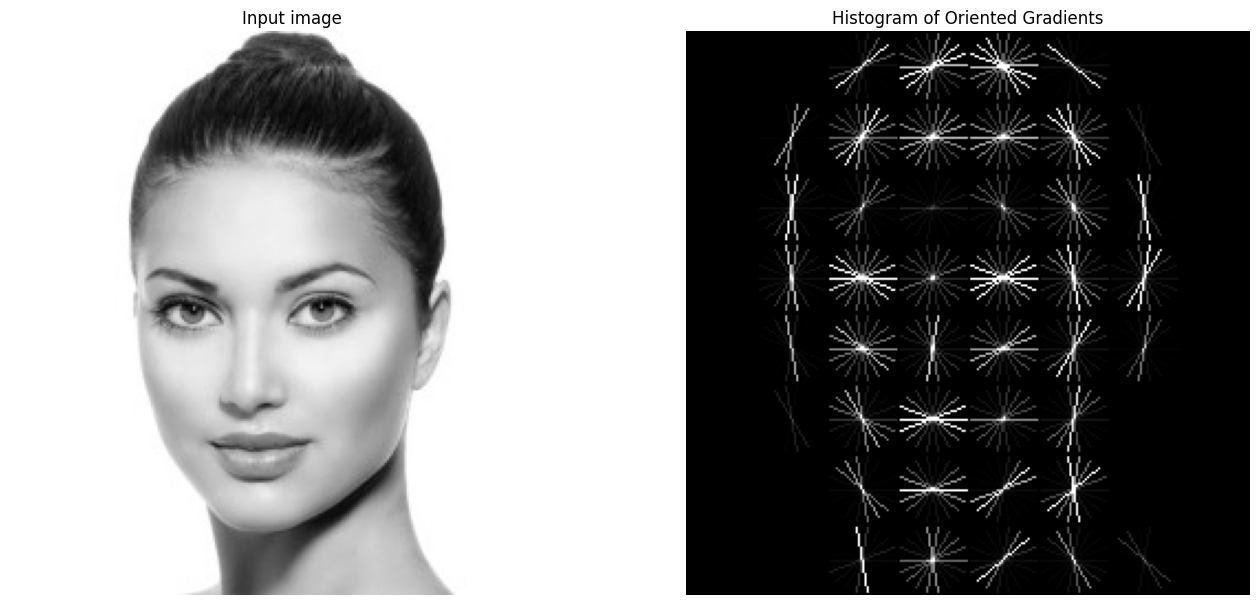

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))
ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()